In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#import plotly.express as px
#import plotly.graph_objects as go
import datetime

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Modelling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (16, 9)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored

import ipywidgets
from ipywidgets import interact


In [4]:
df = pd.read_excel('Online Retail.xlsx',sheet_name='Online Retail')
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


# Exploring the UK Market

In [5]:
uk = df[df["Country"]=="United Kingdom"]
uk.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom


In [6]:
uk['total_price']=uk['Quantity']*uk['UnitPrice']
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [7]:
##Shape of the Data
print("Shape:", uk.shape)
print("The data has",uk.shape[0], "rows")
print("The data has",uk.shape[1], "columns")

Shape: (495478, 9)
The data has 495478 rows
The data has 9 columns


In [8]:
from datetime import datetime
def convert_datetime(uk):
    return datetime.strftime(uk, '%Y-%m-%d %H:%M-%S')

uk['InvoiceDate']= df ['InvoiceDate'].apply(convert_datetime)

In [9]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
 8   total_price  495478 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.8+ MB


In [10]:
uk.describe().T.style.background_gradient(
    subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Quantity,495478.000000,8.605486,227.588756,-80995.000000,1.000000,3.000000,10.000000,80995.000000
UnitPrice,495478.000000,4.532422,99.315438,-11062.060000,1.250000,2.100000,4.130000,38970.000000
CustomerID,361878.000000,15547.871368,1594.402590,12346.000000,14194.000000,15514.000000,16931.000000,18287.000000
total_price,495478.000000,16.525065,394.839116,-168469.600000,3.290000,8.290000,16.630000,168469.600000


## Handling Null Values

In [11]:
##Missing rows of the Data
Missing_Number= uk.isnull().sum().sort_values(ascending=False)
Missing_Percentage=(uk.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
Missing_data = pd.concat([Missing_Number, Missing_Percentage], axis=1)
Missing_data.rename(columns={0: 'Missing_Number',1:'Missing_Percentage'},inplace=True)
print("Missing rows with columns are:\n")
Missing_data.head(10)

Missing rows with columns are:



,Missing_Number,Missing_Percentage
CustomerID,133600,0.25
Description,1454,0.00
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00
total_price,0,NaN


In [12]:
##Dropping Null Values
print('Current dimensions of the data is:', uk.shape)
uk.dropna(inplace=True)
print("New dimensions of the data after removing the missing values is:", uk.shape)
print("Null values:\n",uk.isnull().sum())

Current dimensions of the data is: (495478, 9)
New dimensions of the data after removing the missing values is: (361878, 9)
Null values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_price    0
dtype: int64


## Handling Duplicate Values

In [13]:
##Unique rows of the Data
print("Number of unique rows:\n",uk.nunique())

Number of unique rows:
 InvoiceNo      19857
StockCode       3661
Description     3860
Quantity         426
InvoiceDate    18441
UnitPrice        569
CustomerID      3950
Country            1
total_price     3803
dtype: int64


In [14]:
duplicate_values = uk.duplicated(subset=None, keep='first').sum()
print("Total number of Duplicate rows present in the data are:",duplicate_values)

Total number of Duplicate rows present in the data are: 5150


In [15]:
uk.drop_duplicates(keep='first', inplace=True)
print(duplicate_values,"Duplicates are dropped!")
print("There are no duplicates")

5150 Duplicates are dropped!
There are no duplicates


In [16]:
#Looking for the column names with null values
[features for features in df.columns if df[features].isnull().sum()>0]

['Description', 'CustomerID']

In [17]:
uk = uk[(uk['UnitPrice'] > 0) & (uk['Quantity'] > 0)]

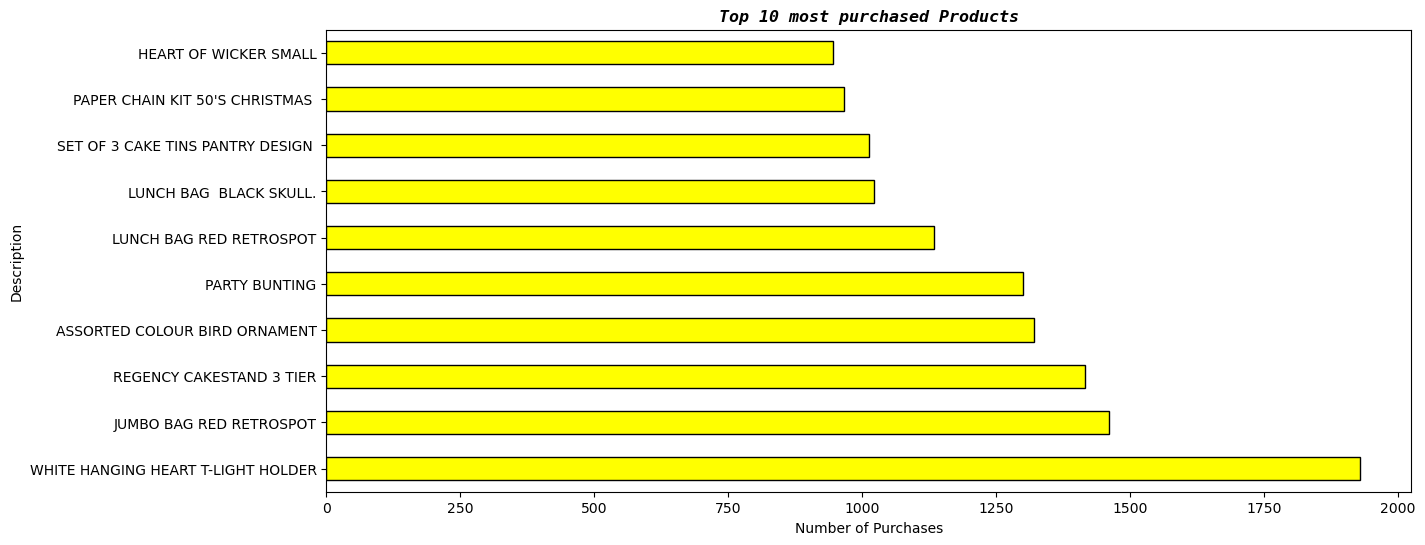

In [18]:
uk["Description"].value_counts().head(10).plot(kind="barh", width=0.5, color='yellow', edgecolor='black', figsize=(14, 6))
plt.xticks(rotation=0)
plt.title('Top 10 most purchased Products',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Description')
plt.xlabel('Number of Purchases')
plt.show();

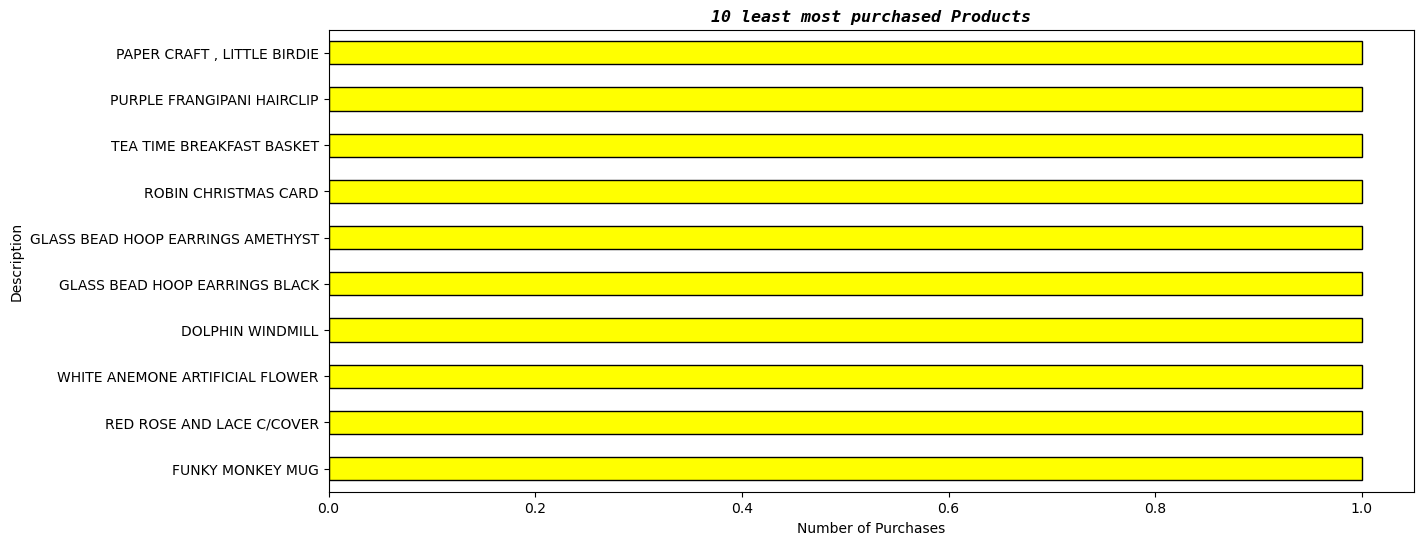

In [19]:
uk["Description"].value_counts().tail(10).plot(kind="barh", width=0.5, color='yellow', edgecolor='black', figsize=(14, 6))
plt.xticks(rotation=0)
plt.title('10 least most purchased Products',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Description')
plt.xlabel('Number of Purchases')
plt.show();

Top 10 Demanded Products By Quantity


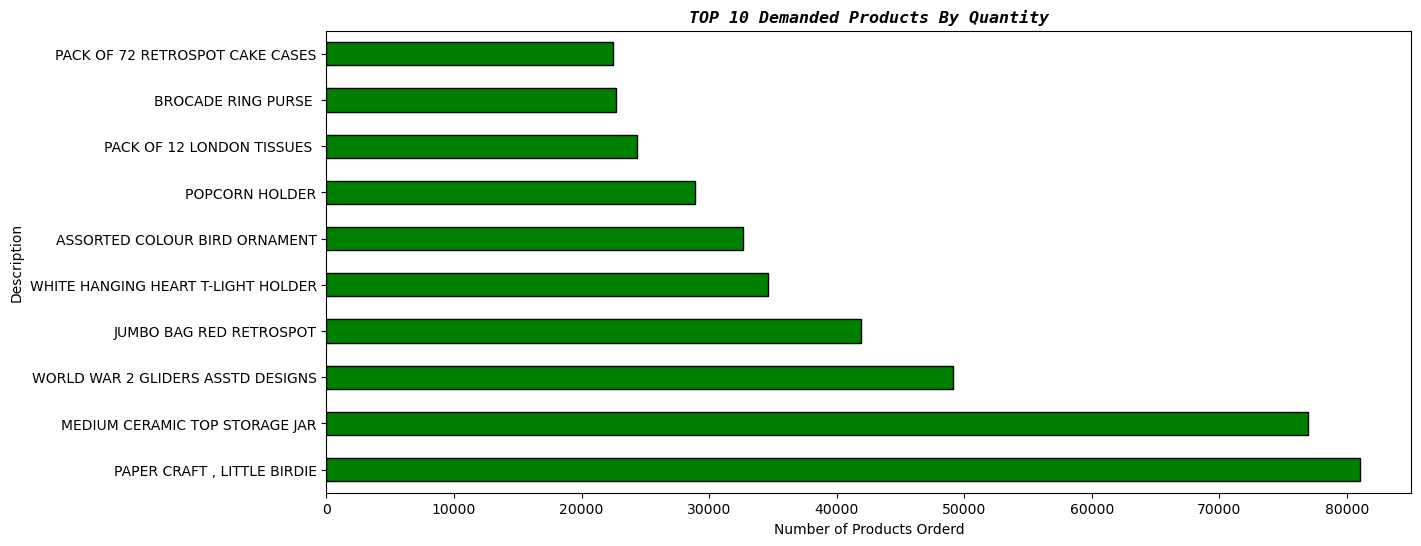

In [20]:
print("Top 10 Demanded Products By Quantity")
uk.groupby("Description")['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind="barh", width=0.5, color='green',edgecolor='black', figsize=(14, 6));
plt.xticks(rotation=0)
plt.title('TOP 10 Demanded Products By Quantity',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Description')
plt.xlabel('Number of Products Orderd')
plt.show();

10 Least Demanded Products By Quantity


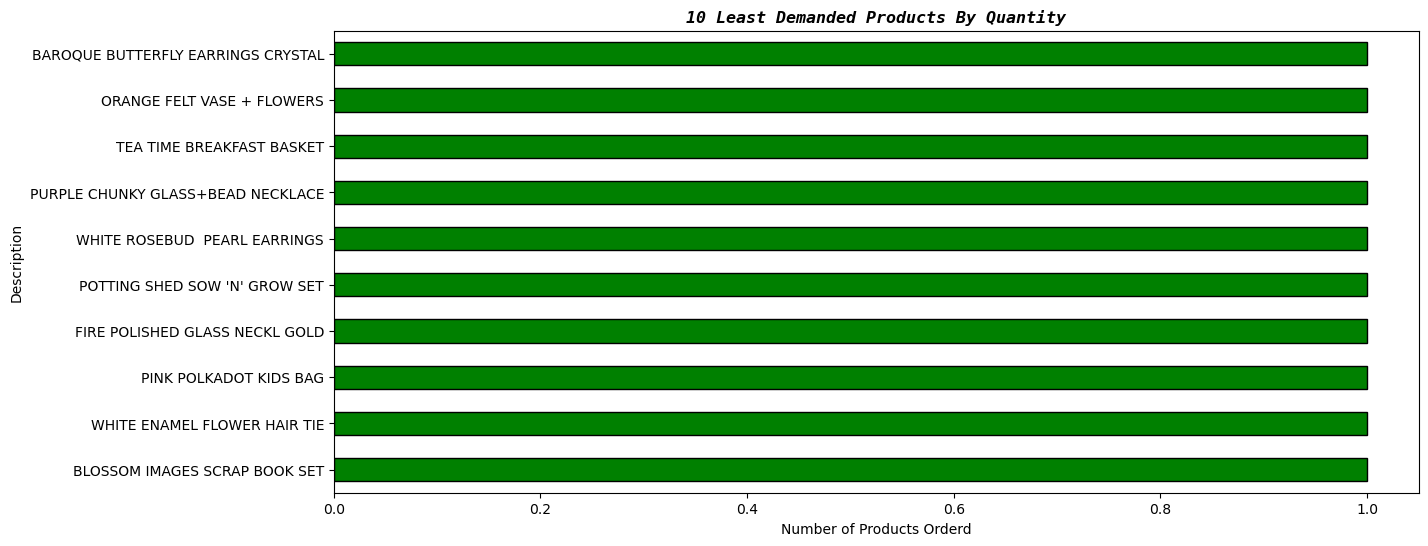

In [21]:
print("10 Least Demanded Products By Quantity")
uk.groupby("Description")['Quantity'].sum().sort_values()[:10].plot(kind="barh", width=0.5, color='green',edgecolor='black', figsize=(14, 6));
plt.xticks(rotation=0)
plt.title('10 Least Demanded Products By Quantity',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Description')
plt.xlabel('Number of Products Orderd')
plt.show();

## Calculating Recency

In [22]:
import datetime as dt
from datetime import datetime
from datetime import timedelta

In [23]:
min_invoice_date = min(uk['InvoiceDate'])
min_invoice_date

'2010-12-01 08:26-00'

In [24]:
max_invoice_date = max(uk['InvoiceDate'])
max_invoice_date

'2011-12-09 12:49-00'

In [25]:
uk['last_purchase_date'] = \
uk.groupby('CustomerID')['InvoiceDate'].transform(max)

In [26]:
uk['last_purchase_date'] = \
pd.to_datetime(uk['last_purchase_date']).dt.date

In [27]:
uk['last_purchase_date'] = \
pd.to_datetime(uk['last_purchase_date'])
uk['InvoiceDate'] = pd.to_datetime(uk['InvoiceDate'])

In [28]:
uk['ref_date'] = uk['InvoiceDate'].max() + timedelta(days=7)

In [29]:
uk['ref_date'] = uk['ref_date'].dt.date

In [30]:
uk['ref_date'] = pd.to_datetime(uk['ref_date'])

In [31]:
uk['date'] = pd.to_datetime(uk['InvoiceDate'])

In [32]:
uk['date'] = uk['date'].dt.date

In [33]:
customer_recency = pd.DataFrame(uk.groupby('CustomerID', as_index=False).date.max())
customer_recency.head()

,CustomerID,date
0,12346.00,2011-01-18
1,12747.00,2011-12-07
2,12748.00,2011-12-09
3,12749.00,2011-12-06
4,12820.00,2011-12-06


In [34]:
uk["customer_recency"] = uk["ref_date"] - uk["last_purchase_date"]
uk[["CustomerID", 'last_purchase_date', "ref_date", "customer_recency"]].head(5)

,CustomerID,last_purchase_date,ref_date,customer_recency
0,17850.00,2010-12-02,2011-12-16,379 days
1,17850.00,2010-12-02,2011-12-16,379 days
2,17850.00,2010-12-02,2011-12-16,379 days
3,17850.00,2010-12-02,2011-12-16,379 days
4,17850.00,2010-12-02,2011-12-16,379 days


In [35]:
uk['recency2'] = \
pd.to_numeric(uk['customer_recency'].dt.days.astype('int64'))
uk[["CustomerID", 'last_purchase_date', "ref_date",\
       "customer_recency", 'recency2']]

,CustomerID,last_purchase_date,ref_date,customer_recency,recency2
0,17850.00,2010-12-02,2011-12-16,379 days,379
1,17850.00,2010-12-02,2011-12-16,379 days,379
2,17850.00,2010-12-02,2011-12-16,379 days,379
3,17850.00,2010-12-02,2011-12-16,379 days,379
4,17850.00,2010-12-02,2011-12-16,379 days,379
...,...,...,...,...,...
541889,15804.00,2011-12-09,2011-12-16,7 days,7
541890,13113.00,2011-12-09,2011-12-16,7 days,7
541891,13113.00,2011-12-09,2011-12-16,7 days,7
541892,13113.00,2011-12-09,2011-12-16,7 days,7


In [36]:
customer_recency = \
uk.groupby('CustomerID', as_index=False)['recency2'].mean()
customer_recency.rename(columns={'recency2':'Recency'}, inplace=True)
customer_recency.sort_values(by='Recency', ascending=False).head()

,CustomerID,Recency
3452,17643.00,380.00
1800,15350.00,380.00
2220,15922.00,380.00
2307,16048.00,380.00
1004,14237.00,380.00


In [37]:
uk.drop(['last_purchase_date'], axis = 1, inplace=True)
uk.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,ref_date,date,customer_recency,recency2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00+00:00,2.55,17850.00,United Kingdom,15.30,2011-12-16,2010-12-01,379 days,379
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00+00:00,3.39,17850.00,United Kingdom,20.34,2011-12-16,2010-12-01,379 days,379
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00+00:00,2.75,17850.00,United Kingdom,22.00,2011-12-16,2010-12-01,379 days,379


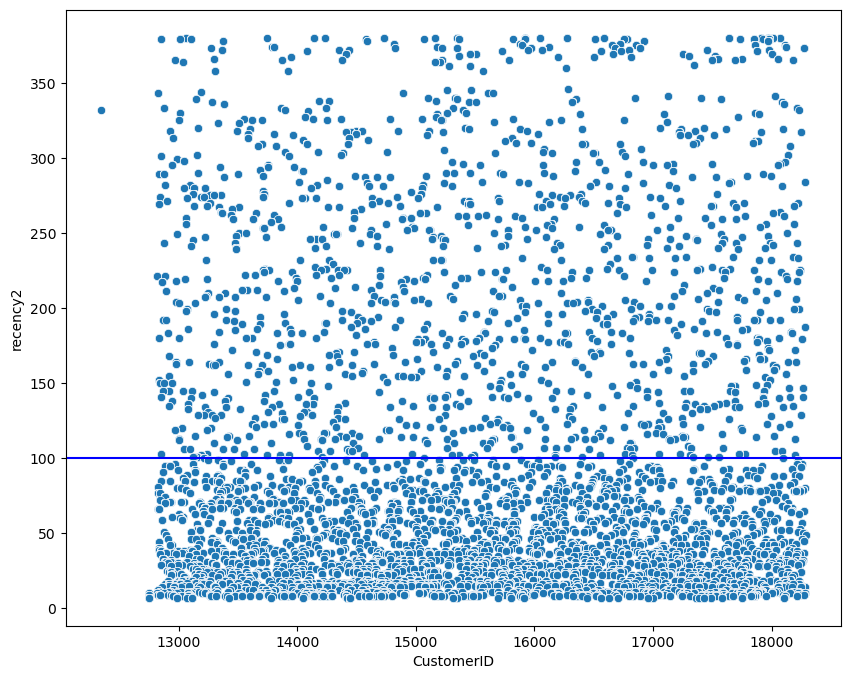

In [38]:
%matplotlib inline

plt.figure(figsize=(10, 8))
graph = sns.scatterplot(data=uk, x="CustomerID", y="recency2")
graph.axhline(100, color="blue")
plt.show();

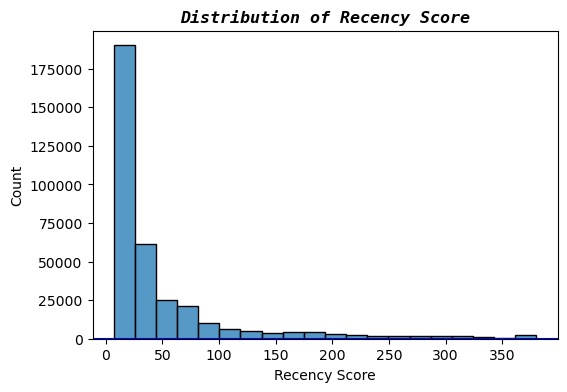

In [39]:
plt.figure(figsize=(6, 4))
graph = sns.histplot(data=uk, x="recency2",bins=20)
graph.axhline(100, color="blue")
plt.title('Distribution of Recency Score',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Count')
plt.xlabel('Recency Score')
plt.show();

## Calculating Frequency

In [40]:
UK_copy = uk.copy()
UK_copy.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,ref_date,date,customer_recency,recency2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00+00:00,2.55,17850.00,United Kingdom,15.30,2011-12-16,2010-12-01,379 days,379
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00+00:00,3.39,17850.00,United Kingdom,20.34,2011-12-16,2010-12-01,379 days,379
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00+00:00,2.75,17850.00,United Kingdom,22.00,2011-12-16,2010-12-01,379 days,379


In [41]:
print("There are", UK_copy.\
      duplicated(subset=None, keep='first').sum(), \
      "duplicated observations in the dataset.")
print(UK_copy.\
      duplicated(subset=None, keep='first').sum(), \
      "Duplicated observations are dropped!")
UK_copy.drop_duplicates(keep='first', inplace=True)

There are 0 duplicated observations in the dataset.
0 Duplicated observations are dropped!


In [42]:
customer_frequency = UK_copy.\
groupby('CustomerID', as_index=False)['InvoiceNo'].nunique()
customer_frequency.\
rename(columns={'InvoiceNo':'Frequency'}, inplace=True)
customer_frequency.sort_values(by='Frequency').sample(5)

,CustomerID,Frequency
2232,15944.00,1
1805,15358.00,22
3691,17969.00,2
194,13092.00,5
1155,14459.00,1


In [43]:
customer_frequency.nlargest(5, "Frequency")

,CustomerID,Frequency
2,12748.00,209
3593,17841.00,124
191,13089.00,97
1267,14606.00,93
1771,15311.00,91


In [44]:
customer_frequency.nsmallest(5, "Frequency")

,CustomerID,Frequency
0,12346.00,1
5,12821.00,1
8,12824.00,1
14,12831.00,1
16,12833.00,1


Text(0, 0.5, 'Count')

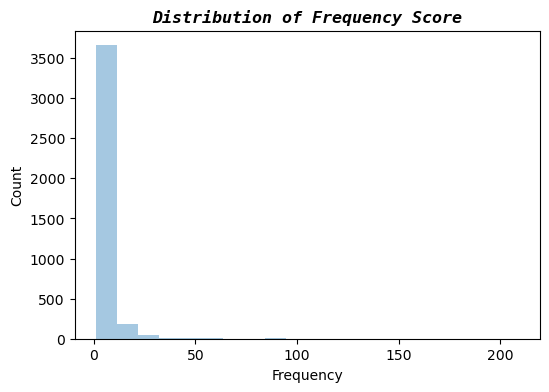

In [45]:
plt.figure(figsize=(6, 4))
sns.distplot(customer_frequency['Frequency'], kde=False, bins=20)
plt.title('Distribution of Frequency Score',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Count')

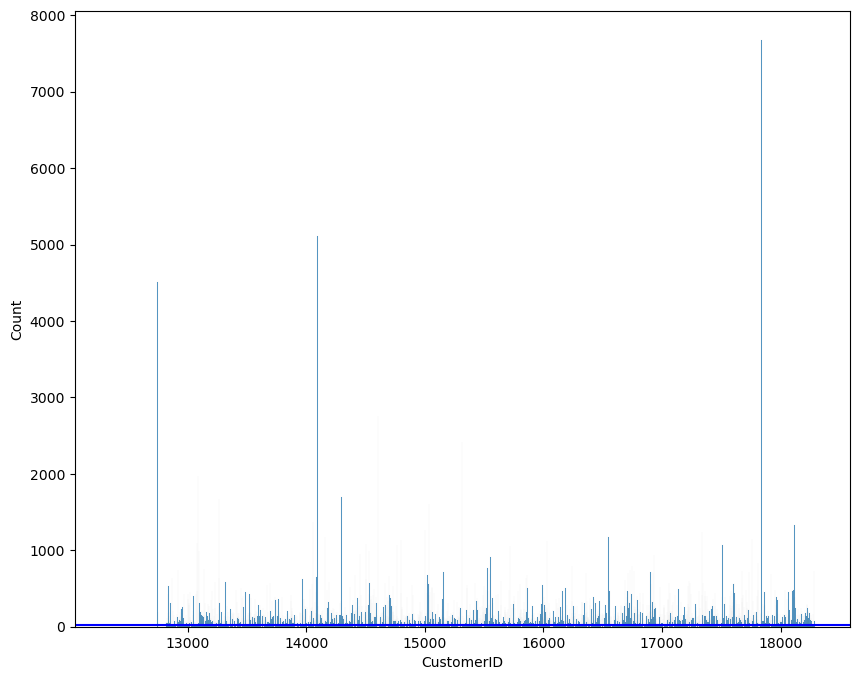

In [46]:
plt.figure(figsize=(10, 8))
graph = sns.histplot(data=UK_copy, x='CustomerID',bins=3000)
graph.axhline(20, color="blue")
plt.show();

## Calculating Monetary Values

In [47]:
customer_monetary = UK_copy.groupby\
('CustomerID',as_index=False)['total_price'].sum()
customer_monetary.rename\
(columns={'total_price':'Monetary'}, inplace=True)
customer_monetary.sort_values\
(by='Monetary').sample(5)

,CustomerID,Monetary
3888,18240.00,422.58
293,13227.00,257.70
1802,15353.00,770.12
819,13982.00,1871.81
2461,16250.00,389.44


In [48]:
customer_monetary.nlargest(5, "Monetary")

,CustomerID,Monetary
3783,18102.00,259657.30
3314,17450.00,194390.79
2598,16446.00,168472.50
3356,17511.00,91062.38
2294,16029.00,80850.84


In [49]:
customer_monetary.nsmallest(5, "Monetary")

,CustomerID,Monetary
2807,16738.00,3.75
1398,14792.00,6.20
2604,16454.00,6.90
3680,17956.00,12.75
2913,16878.00,13.30


Text(0.5, 0, 'Monetary Value')

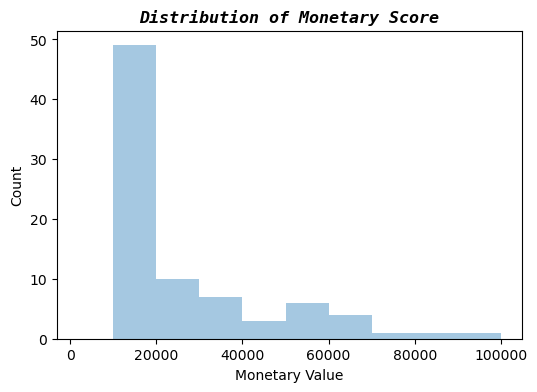

In [50]:
plt.figure(figsize=(6, 4))
sns.distplot(customer_monetary['Monetary'], kde=False, bins=[10000, 20000, 30000, 40000, 50000,60000,70000,80000,90000,100000]);
plt.title('Distribution of Monetary Score',fontsize='large',
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Count')
plt.xlabel('Monetary Value')

## Creating RFM Table

In [51]:
customer_rfm = pd.\
merge(pd.merge(customer_recency, customer_frequency, \
               on='CustomerID'), customer_monetary, \
      on='CustomerID')
customer_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.00,332.00,1,77183.60
1,12747.00,9.00,11,4196.01
2,12748.00,7.00,209,33053.19
3,12749.00,10.00,5,4090.88
4,12820.00,10.00,4,942.34


## Creating Customer Segmentation with RFM Scores

In [52]:
customer_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.00,3920.00,3920.00,3920.00
mean,15562.06,98.74,4.25,1858.42
std,1576.59,99.53,7.20,7478.63
min,12346.00,7.00,1.00,3.75
25%,14208.75,24.00,1.00,298.19
50%,15569.50,57.00,2.00,644.97
75%,16913.25,149.00,5.00,1571.28
max,18287.00,380.00,209.00,259657.30


## Creating the RFM Segmentation Table

In [53]:
def recency_scoring(rfm):
    if rfm.Recency <= 24.0:
        recency_score = 4
    elif rfm.Recency <= 57.0:
        recency_score = 3
    elif rfm.Recency <= 149.0:
        recency_score = 2
    else:
        recency_score = 1
    return recency_score

customer_rfm['Recency_Score'] = customer_rfm.apply(recency_scoring, axis=1)
customer_rfm.sample(10)

,CustomerID,Recency,Frequency,Monetary,Recency_Score
1654,15154.00,82.00,1,254.28,2
438,13428.00,17.00,1,201.78,4
1607,15098.00,189.00,3,39916.50,1
302,13239.00,268.00,1,329.56,1
2901,16856.00,21.00,1,35.40,4
3005,17004.00,53.00,2,1312.14,3
3409,17582.00,243.00,1,175.27,1
2733,16638.00,29.00,10,1680.72,3
723,13848.00,99.00,3,1255.00,2
3118,17169.00,64.00,2,835.78,2


In [54]:
customer_rfm['Recency_Score'].value_counts().sort_index()

Recency_Score
1     979
2     969
3     969
4    1003
Name: count, dtype: int64

Text(0.5, 1.0, 'Proportions of Recency scores for customers')

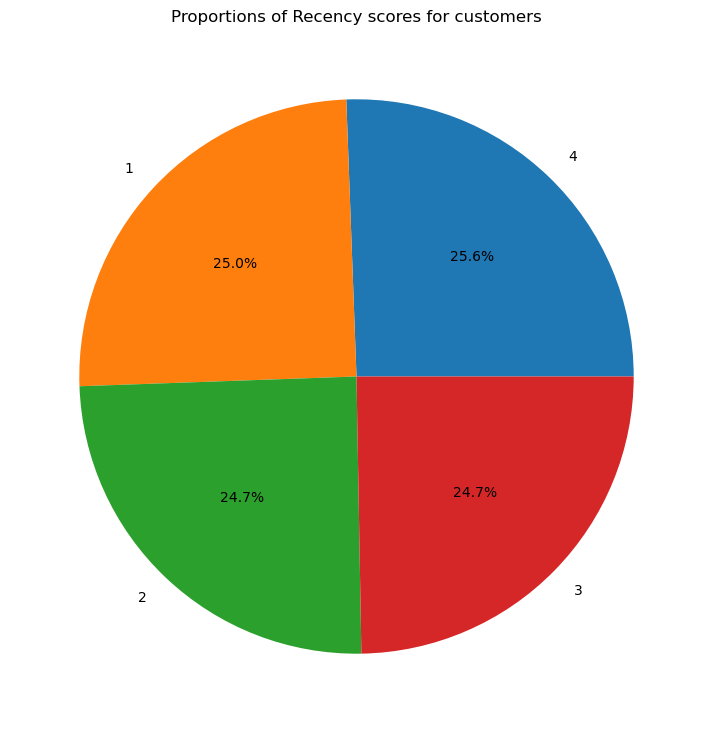

In [55]:
plt.pie(customer_rfm['Recency_Score'].value_counts(),labels=customer_rfm['Recency_Score'].value_counts().index,autopct='%1.1f%%')
plt.title("Proportions of Recency scores for customers")

In [56]:
def frequency_scoring(rfm):
    if rfm.Frequency >= 10.0:
        frequency_score = 4
    elif rfm.Frequency >= 5.0:
        frequency_score = 3
    elif rfm.Frequency >= 2.0:
        frequency_score = 2
    else:
        frequency_score = 1
    return frequency_score

customer_rfm['Frequency_Score'] = customer_rfm.apply(frequency_scoring, axis=1)
customer_rfm.sample(10)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score
3185,17265.00,145.00,2,550.01,2,2
1749,15277.00,53.00,1,255.90,3,1
255,13171.00,28.00,3,468.41,3,2
3754,18065.00,12.00,14,2392.83,4,4
1134,14427.00,57.00,2,363.34,3,2
1592,15076.00,179.00,1,880.85,1,1
516,13536.00,8.00,7,3444.39,4,3
3006,17006.00,11.00,4,781.78,4,2
199,13098.00,8.00,28,28882.44,4,4
2642,16505.00,38.00,1,777.60,3,1


In [57]:
customer_rfm['Frequency_Score'].value_counts().sort_index()

Frequency_Score
1    1350
2    1563
3     652
4     355
Name: count, dtype: int64

Text(0.5, 1.0, 'Proportions of Frequency scores for customers')

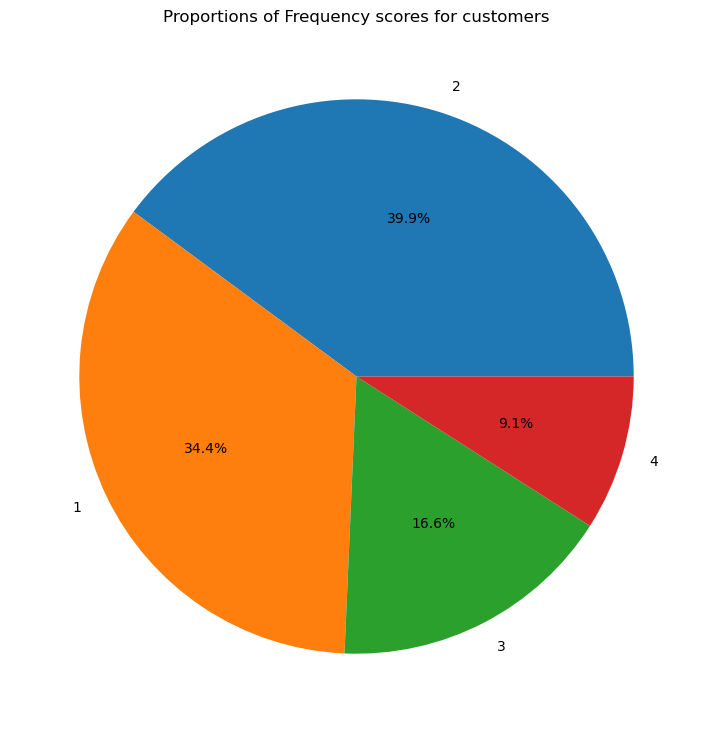

In [58]:
plt.pie(customer_rfm['Frequency_Score'].value_counts(),labels=customer_rfm['Frequency_Score'].value_counts().index,autopct='%1.1f%%')
plt.title("Proportions of Frequency scores for customers")

In [59]:
def monetary_scoring(rfm):
    if rfm.Monetary >= 1571.0:
        monetary_score = 4
    elif rfm.Monetary >= 645.0:
        monetary_score = 3
    elif rfm.Monetary >= 298.0:
        monetary_score = 2
    else:
        monetary_score = 1
    return monetary_score

customer_rfm['Monetary_Score'] = customer_rfm.apply(monetary_scoring, axis=1)
customer_rfm.sample(10)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
1647,15146.00,171.00,2,1327.16,1,2,3
2444,16227.00,232.00,1,314.22,1,1,2
1650,15149.00,140.00,1,520.80,2,1,2
629,13707.00,274.00,2,806.41,1,2,3
3464,17656.00,80.00,5,1674.69,2,3,4
1610,15101.00,15.00,2,317.53,4,2,2
882,14067.00,70.00,2,374.70,2,2,2
1288,14639.00,59.00,6,2984.49,2,3,4
22,12840.00,150.00,4,2726.77,1,2,4
3390,17555.00,26.00,2,480.31,3,2,2


In [60]:
customer_rfm['Monetary_Score'].value_counts().sort_index()

Monetary_Score
1    978
2    982
3    980
4    980
Name: count, dtype: int64

Text(0.5, 1.0, 'Proportions of Monetary scores for customers')

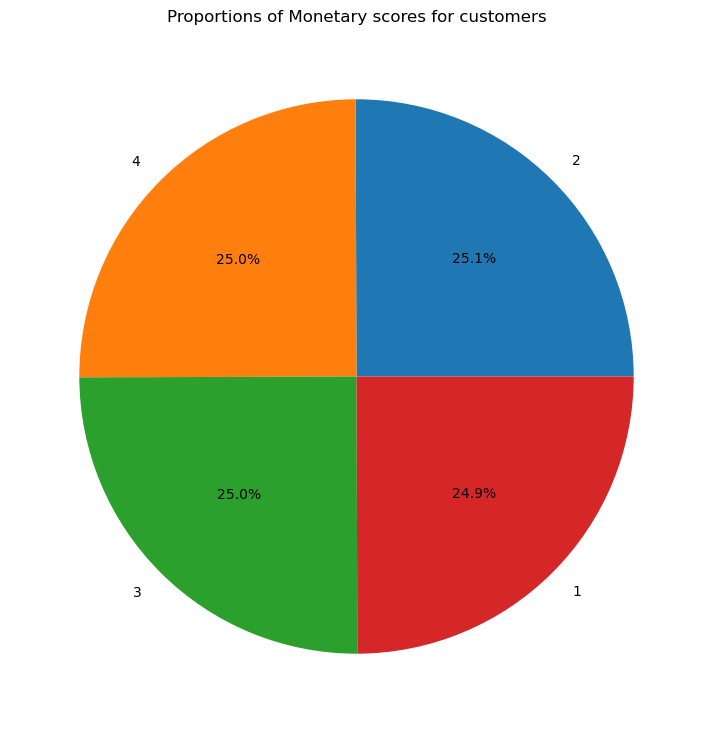

In [61]:
plt.pie(customer_rfm['Monetary_Score'].value_counts(),labels=customer_rfm['Monetary_Score'].value_counts().index,autopct='%1.1f%%')
plt.title("Proportions of Monetary scores for customers")

In [62]:
def rfm_scoring(customer):
    return str(int(customer['Recency_Score'])) + \
str(int(customer['Frequency_Score'])) + \
str(int(customer['Monetary_Score']))


customer_rfm['Customer_RFM_Score'] = \
customer_rfm.apply(rfm_scoring, axis=1)
customer_rfm.sample(8)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score
3521,17728.00,10.00,3,2876.01,4,2,4,424
359,13317.00,73.00,6,2273.68,2,3,4,234
2812,16745.00,93.00,17,7180.70,2,4,4,244
148,13027.00,120.00,6,6912.00,2,3,4,234
1449,14865.00,14.00,2,52.20,4,2,1,421
1584,15067.00,85.00,3,1744.76,2,2,4,224
2837,16773.00,64.00,1,171.59,2,1,1,211
3063,17084.00,42.00,2,2747.99,3,2,4,324


In [63]:
customer_rfm['RFM_Label'] = \
customer_rfm['Recency_Score'] + \
customer_rfm['Frequency_Score'] + \
customer_rfm['Monetary_Score']

customer_rfm.sample(8)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label
222,13131.00,30.00,3,1073.30,3,2,3,323,8
3245,17357.00,31.00,2,384.39,3,2,2,322,7
3811,18142.00,164.00,2,1019.52,1,2,3,123,6
2770,16689.00,82.00,2,422.60,2,2,2,222,6
2624,16479.00,17.00,2,300.83,4,2,2,422,8
979,14208.00,101.00,1,151.74,2,1,1,211,4
446,13439.00,262.00,1,283.71,1,1,1,111,3
2935,16907.00,36.00,5,928.76,3,3,3,333,9


In [64]:
segments = {'Customer_Segment':['Champion', 
                                'Top Loyal Customer', 
                                'Loyal Customer', 
                                'Top Recent Customer', 
                                'Recent Customer', 
                                'Top Customer Needed Attention', 
                                'Customer Needed Attention', 
                                'Top Lost Customer', 
                                'Lost Customer'],
            'RFM':['(2|3|4)-(4)-(4)', 
                   '(3)-(1|2|3|4)-(3|4)', 
                   '(3)-(1|2|3|4)-(1|2)', 
                   '(4)-(1|2|3|4)-(3|4)', 
                   '(4)-(1|2|3|4)-(1|2)',
                   '(2|3)-(1|2|3|4)-(3|4)', 
                   '(2|3)-(1|2|3|4)-(1|2)',
                   '(1)-(1|2|3|4)-(3|4)', 
                   '(1)-(1|2|3|4)-(1|2)',]}

pd.DataFrame(segments)

,Customer_Segment,RFM
0,Champion,(2|3|4)-(4)-(4)
1,Top Loyal Customer,(3)-(1|2|3|4)-(3|4)
2,Loyal Customer,(3)-(1|2|3|4)-(1|2)
3,Top Recent Customer,(4)-(1|2|3|4)-(3|4)
4,Recent Customer,(4)-(1|2|3|4)-(1|2)
5,Top Customer Needed Attention,(2|3)-(1|2|3|4)-(3|4)
6,Customer Needed Attention,(2|3)-(1|2|3|4)-(1|2)
7,Top Lost Customer,(1)-(1|2|3|4)-(3|4)
8,Lost Customer,(1)-(1|2|3|4)-(1|2)


In [65]:
def categorizer(rfm):
    
    if (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['4']) & (rfm[2] in ['4']):
        rfm = 'Champion'
        
    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Loyal Customer'
        
    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Loyal Customer'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Recent Customer'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Recent Customer'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Customer Needed Attention'    
   
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Customer Needed Attention'
    
    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Lost Customer'
                
    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost Customer'
    
    return rfm 
customer_rfm['Customer_Category'] = customer_rfm["Customer_RFM_Score"].apply(categorizer)
customer_rfm

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label,Customer_Category
0,12346.00,332.00,1,77183.60,1,1,4,114,6,Top Lost Customer
1,12747.00,9.00,11,4196.01,4,4,4,444,12,Champion
2,12748.00,7.00,209,33053.19,4,4,4,444,12,Champion
3,12749.00,10.00,5,4090.88,4,3,4,434,11,Top Recent Customer
4,12820.00,10.00,4,942.34,4,2,3,423,9,Top Recent Customer
...,...,...,...,...,...,...,...,...,...,...
3915,18280.00,284.00,1,180.60,1,1,1,111,3,Lost Customer
3916,18281.00,187.00,1,80.82,1,1,1,111,3,Lost Customer
3917,18282.00,14.00,2,178.05,4,2,1,421,7,Recent Customer
3918,18283.00,10.00,16,2045.53,4,4,4,444,12,Champion


In [66]:
## N0t important
customer_rfm.groupby('Customer_Category').RFM_Label.mean().round(0)

Customer_Category
Champion                        12.00
Customer Needed Attention        5.00
Lost Customer                    4.00
Loyal Customer                   6.00
Recent Customer                  7.00
Top Customer Needed Attention    8.00
Top Lost Customer                6.00
Top Loyal Customer               9.00
Top Recent Customer             10.00
Name: RFM_Label, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Top Lost Customer'),
  Text(0, 1, 'Recent Customer'),
  Text(0, 2, 'Champion'),
  Text(0, 3, 'Loyal Customer'),
  Text(0, 4, 'Top Customer Needed Attention'),
  Text(0, 5, 'Top Loyal Customer'),
  Text(0, 6, 'Top Recent Customer'),
  Text(0, 7, 'Customer Needed Attention'),
  Text(0, 8, 'Lost Customer')])

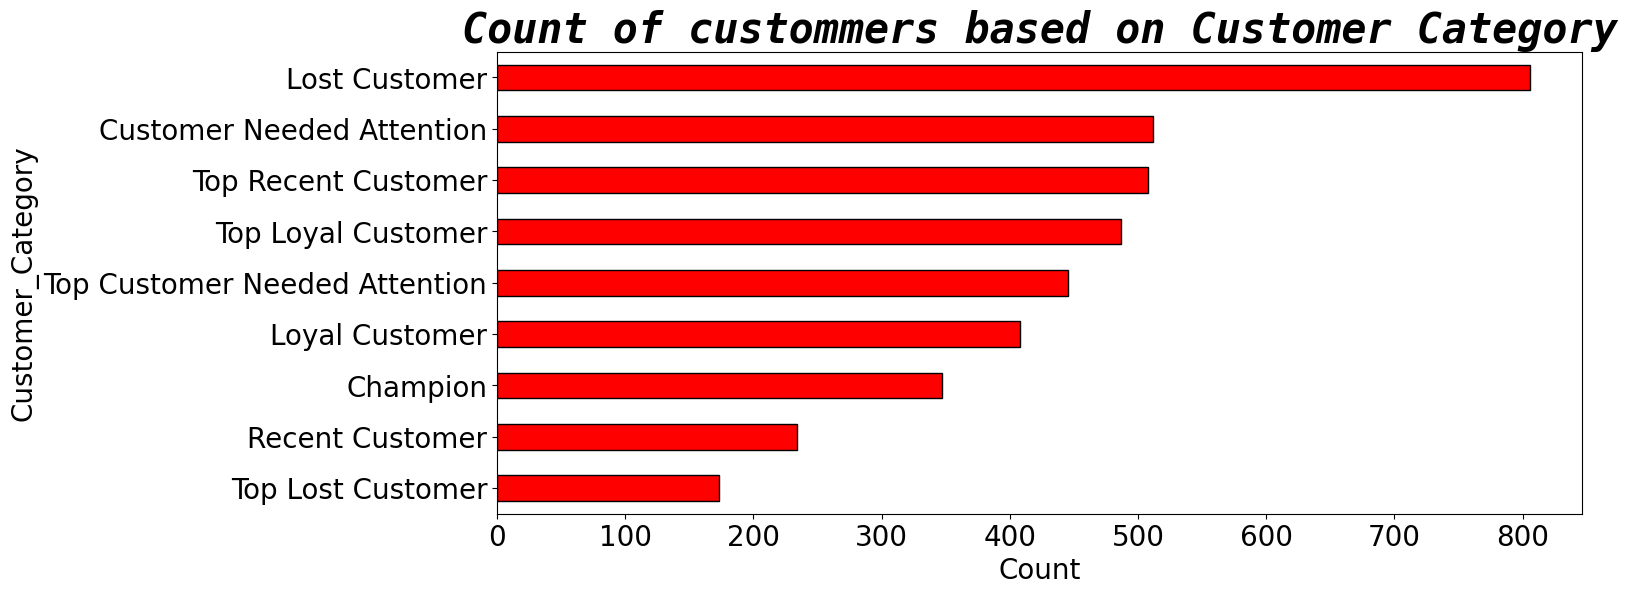

In [67]:
## Check Once Again
customer_rfm.groupby("Customer_Category")['RFM_Label'].count().sort_values()[:10].plot(kind="barh", width=0.5, color='red',edgecolor='black', figsize=(14, 6));
plt.xticks(rotation=0)
plt.title('Count of custommers based on Customer Category',fontsize=30,
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Customer_Category',fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [68]:
segmentation = pd.DataFrame(customer_rfm.Customer_Category.value_counts(dropna=False).sort_values(ascending=False))
segmentation.reset_index(inplace=True)
segmentation.rename(columns={'index':'Customer Category', 'Customer_Category':'Number Of Customers'}, inplace=True)
segmentation

,Number Of Customers,count
0,Lost Customer,806
1,Customer Needed Attention,512
2,Top Recent Customer,508
3,Top Loyal Customer,487
4,Top Customer Needed Attention,445
5,Loyal Customer,408
6,Champion,347
7,Recent Customer,234
8,Top Lost Customer,173


In [69]:
## Comment on each type of customers along with cust_id and what plan should they have for these people.

## RFM Completed

# K_Means Clustering Starts

#### Data preperation for analysis:

Data Normalization-
1 Logarithmic method

In [70]:
customer_rfm[['Recency', 'Frequency', 'Monetary']].sample(10)

,Recency,Frequency,Monetary
2809,53.00,1,464.90
533,26.00,2,240.22
3564,288.00,1,225.90
135,63.00,1,81.57
3191,234.00,2,1065.35
2193,205.00,4,516.36
666,294.00,1,741.26
738,14.00,2,3192.54
2433,85.00,1,159.00
3305,95.00,1,303.16


In [71]:
customer_rfm.set_index("CustomerID", inplace=True)

In [72]:
# **Handling with Skewness - np.log**

skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = customer_rfm[['Recency', 'Frequency', 'Monetary']].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Monetary    20.22
Frequency   10.75
Recency      1.24
dtype: float64

In [73]:
rfm_log = customer_rfm[skew_cols.index].copy()

for col in skew_cols.index.values:
    rfm_log[col] = rfm_log[col].apply(np.log1p)

    print(rfm_log.skew())
print()



Monetary     0.37
Frequency   10.75
Recency      1.24
dtype: float64
Monetary    0.37
Frequency   1.18
Recency     1.24
dtype: float64
Monetary    0.37
Frequency   1.18
Recency     0.01
dtype: float64



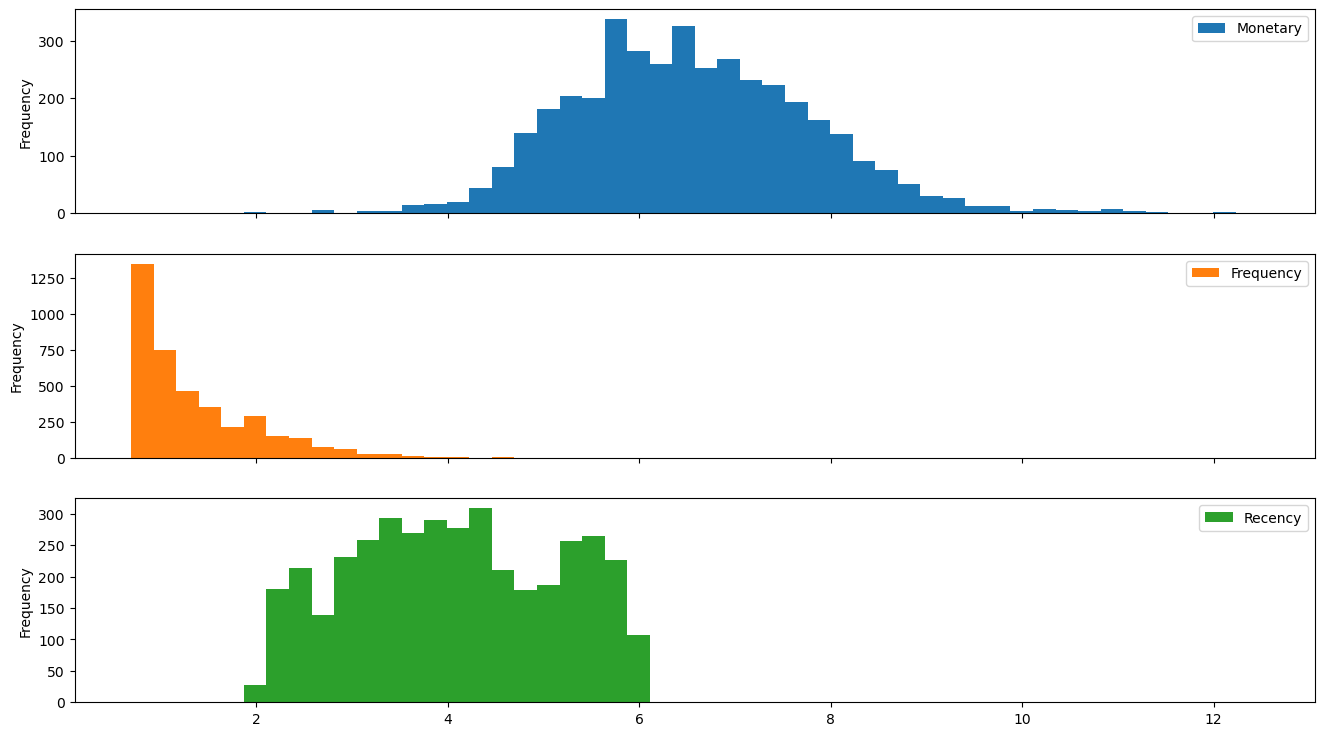

In [74]:
rfm_log.plot(kind='hist', subplots=True, bins=50);

In [75]:
# Interpreting Skewness 

for skew in rfm_log.skew():
    if -0.75 < skew < 0.75:
        print ("The skewness value is", 
               '\033[1m', Fore.GREEN, skew, '\033[0m', 
               "indicating that the distribution is almost.",
               '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.75 < skew < -1.0 or 0.75 < skew < 1.0:
        print ("The skewness value is",
               '\033[1m', Fore.YELLOW, skew, '\033[0m',
               "indicating that the distribution is almost.",
               '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("The skewness value is", 
               '\033[1m', Fore.RED, skew, '\033[0m', 
               "indicating that the distribution is almost.",
               '\033[1m', Fore.RED, "highly skewed", '\033[0m')

The skewness value is   0.37313451126449804  indicating that the distribution is almost.   symmetric 
The skewness value is   1.1822488645974094  indicating that the distribution is almost.   highly skewed 
The skewness value is   0.012833254809253406  indicating that the distribution is almost.   symmetric 


In [76]:
rfm_log.head(10)

,Monetary,Frequency,Recency
CustomerID,,,
12346.00,11.25,0.69,5.81
12747.00,8.34,2.48,2.30
12748.00,10.41,5.35,2.08
12749.00,8.32,1.79,2.40
12820.00,6.85,1.61,2.40
12821.00,4.54,0.69,5.40
12822.00,6.86,1.10,4.36
12823.00,7.47,1.79,4.41
12824.00,5.99,0.69,4.20


In [77]:
# **Handling with Skewness - Power Transformer**

rfm_before_trans = customer_rfm[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(rfm_before_trans)
rfm_trans = pd.DataFrame(trans, columns =skew_cols.index )

print(rfm_trans.skew())
print()

Monetary    -0.01
Frequency    0.22
Recency      0.00
dtype: float64



In [78]:
# Interpreting Skewness 

for skew in rfm_trans.skew():
    if -0.75 < skew < 0.75:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.75 < skew < -1.0 or 0.75 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   -0.01374891571122692  means that the distribution is approx.   symmetric 
A skewness value of   0.21568148042925467  means that the distribution is approx.   symmetric 
A skewness value of   0.0026472964982634756  means that the distribution is approx.   symmetric 


In [79]:
# Interpreting Skewness 

for skew in rfm_trans.skew():
    if -0.75 < skew < 0.75:
        print ("The skewness value is", 
               '\033[1m', Fore.GREEN, skew, '\033[0m', 
               "indicating that the distribution is almost.",
               '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.75 < skew < -1.0 or 0.75 < skew < 1.0:
        print ("The skewness value is",
               '\033[1m', Fore.YELLOW, skew, '\033[0m',
               "indicating that the distribution is almost.",
               '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("The skewness value is", 
               '\033[1m', Fore.RED, skew, '\033[0m', 
               "indicating that the distribution is almost.",
               '\033[1m', Fore.RED, "highly skewed", '\033[0m')

The skewness value is   -0.01374891571122692  indicating that the distribution is almost.   symmetric 
The skewness value is   0.21568148042925467  indicating that the distribution is almost.   symmetric 
The skewness value is   0.0026472964982634756  indicating that the distribution is almost.   symmetric 


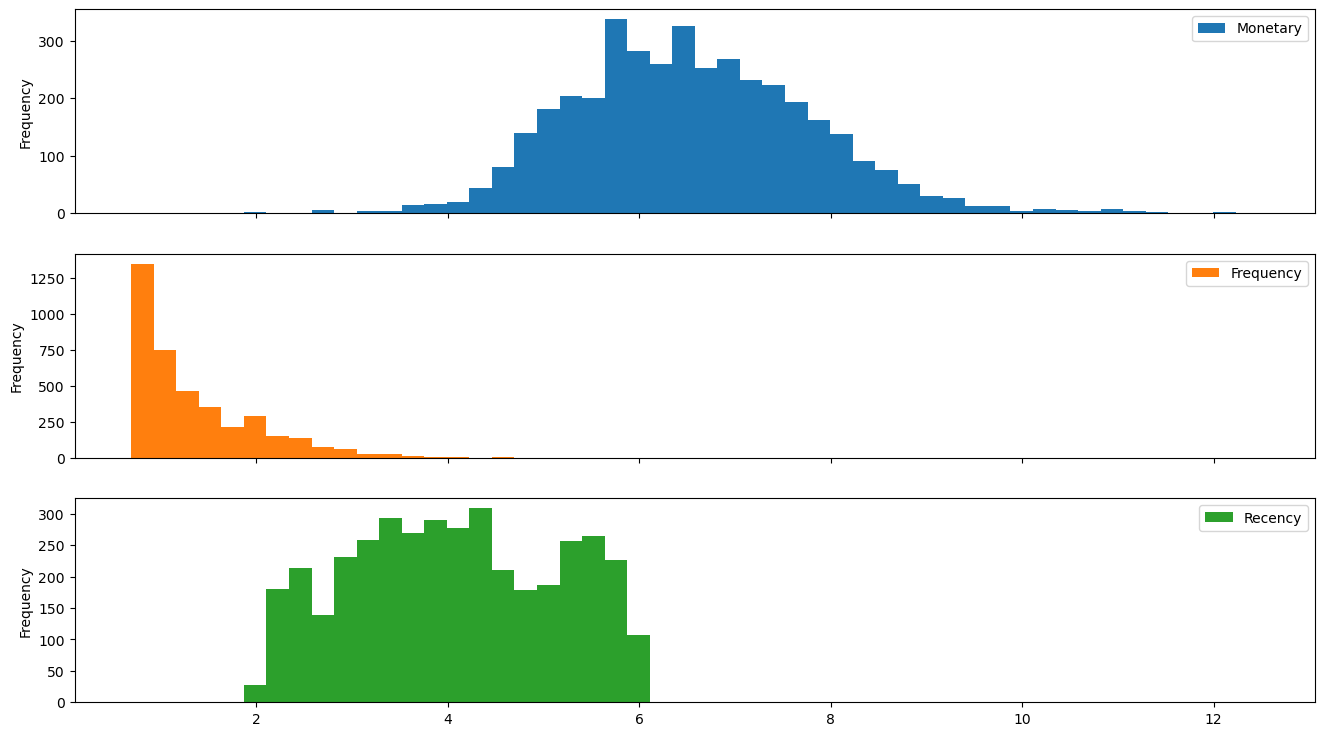

In [80]:
rfm_log.plot(kind='hist',subplots=True,bins=50);

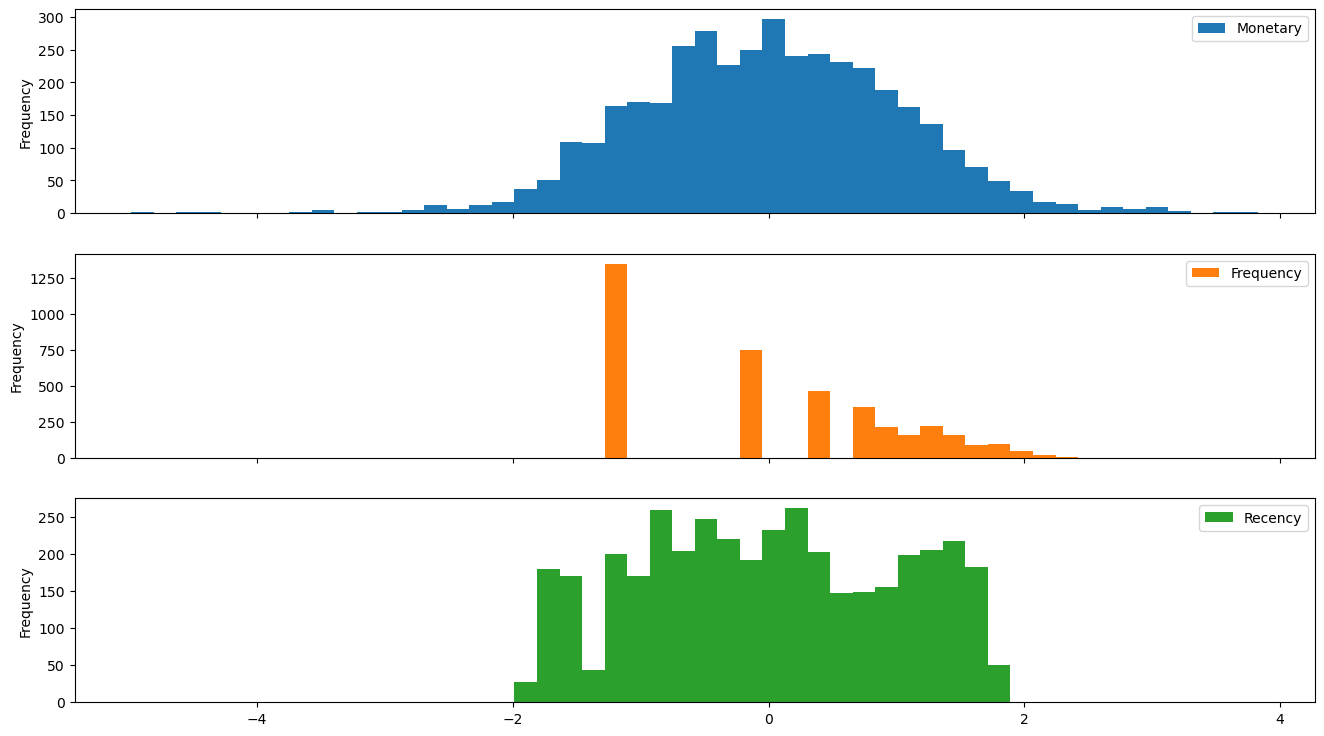

In [81]:
rfm_trans.plot(kind='hist', subplots=True, bins=50);

Rather than applying log1p method for dealing with skewness, using PowerTransformer(method='yeo-johnson') for normalization process gave better results. So we will continue with rfm_trans for further analysis.

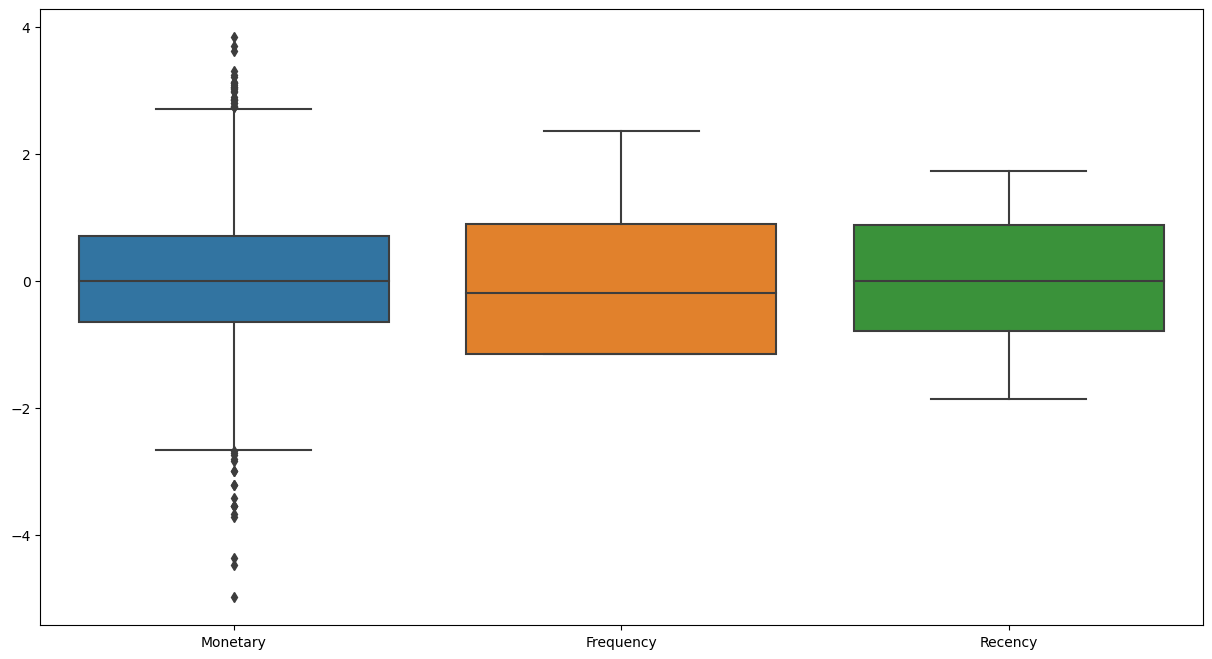

In [82]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = rfm_trans);

With respect to normalization process, 2 different methods werw used; log1p method and PowerTransformer(method='yeo-johnson'). Both revealed different results. Since the results given by PowerTransformer(method='yeo-johnson') are better than the one by log1p, the dataframe normalized by PowerTransformer(method='yeo-johnson') method will be prefered to use for the further analysis.

## K-Means Implementation

#### Defining number of clusters:

In [83]:
#pip install --upgrade pip setuptools wheel

In [85]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [86]:
#pip install meson

In [87]:
#pip install --upgrade pip

In [88]:
#pip install importlib-metadata

In [89]:
#pip install --upgrade setuptools

In [90]:
#pip install subprocess.run

In [91]:
#pip install wheel setuptools pip --upgrade

In [92]:
#pip install toml

In [93]:
#pip install numpy --use-deprecated=legacy-resolver

In [94]:
#pip install setuptools-metadata

In [95]:
#pip install --user pyclustertend

In [96]:
from sklearn.cluster import KMeans, AgglomerativeClustering
#from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [97]:
#pip install --user yellowbrick

In [98]:
from yellowbrick.cluster import KElbowVisualizer

In [99]:
# Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(rfm_trans)

#Store it separately for clustering
rfm_scaled = scaler.transform(rfm_trans)
# hopkins(rfm_log, rfm_log.shape[0])

# hopkins(rfm_scaled, rfm_scaled.shape[0])

The Hopkins statistic is a way of measuring the cluster tendency of a data set. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0. The rule of the thumb is that if the Hopkins statistic is above 0.5, then the dataset is not clusterable.

If the value of Hopkins is close to zero, then we can reject null hypothesis and deduce that dataset contains meaningful clusters. Usually, we can believe in the existence of clusters when the hopkins score is bellow 0.25. Thus, for clusterable datasets Hopkins statistic should be close to 0. In our study Hopkins test score demonstrates a clusterable dataset with a value of 0.08851755713643386.

### The Elbow Method

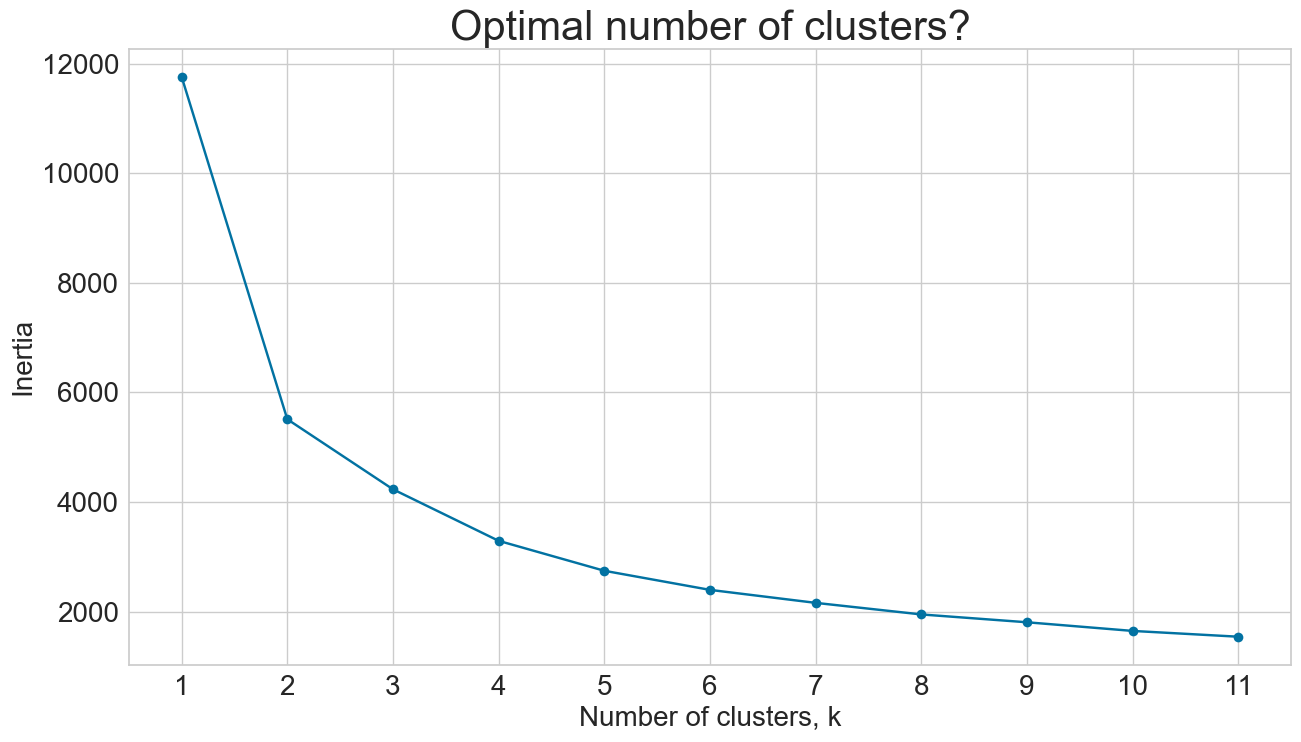

In [100]:
#First : Get the Best KMeans 
ks = range(1, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(rfm_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k',fontsize=20)
plt.ylabel('Inertia',fontsize=20)
plt.xticks(ks,fontsize=20)
plt.yticks(fontsize=20)
plt.style.use('ggplot')
plt.title('Optimal number of clusters?',fontsize=30)
plt.show()


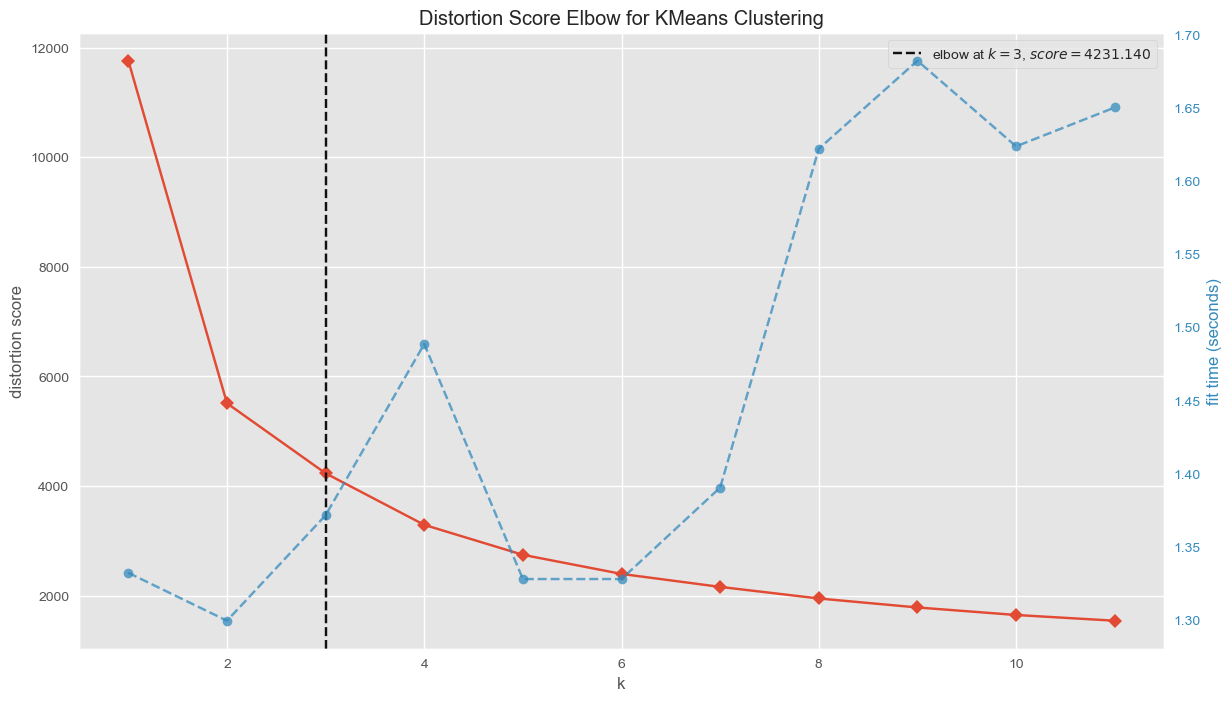

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

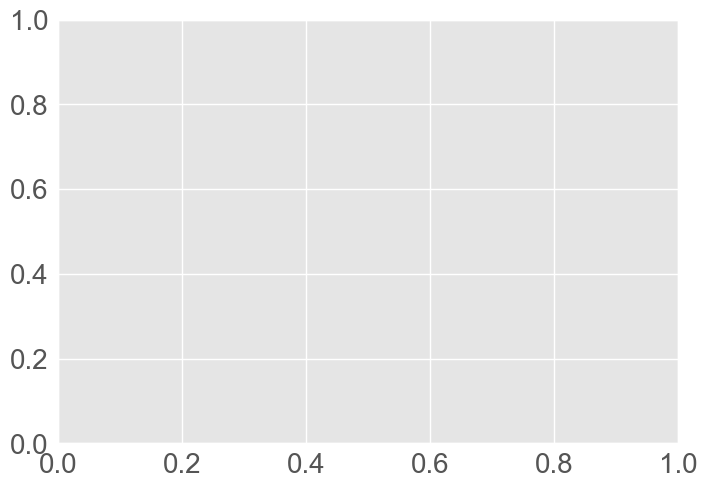

In [101]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))

plt.figure(figsize=(14, 8))
visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In the visualizer above, the KElbowVisualizer fits the model for a range of RFM clusters values from 1 to 11, which is set by the parameter k=(1, 12). When the model is fit with 3 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since we created our synthetic dataset with 3 clusters of points.

So it can be concluded that according to YellowBrick Elbow method above we are recommended to apply 3 n_clusters for modelling. In addition we will check Classic Elbow Method for a better decision-making.

No silhouette method

### Silhouette Coefficient

In [102]:
ssd =[]

K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(rfm_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(rfm_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.437202710503398
Silhouette Score for 3 clusters: 0.33106981651531686
Silhouette Score for 4 clusters: 0.3452413913682436
Silhouette Score for 5 clusters: 0.3340670599093108
Silhouette Score for 6 clusters: 0.3306402353550021
Silhouette Score for 7 clusters: 0.3101049115317857
Silhouette Score for 8 clusters: 0.301647870075919
Silhouette Score for 9 clusters: 0.3026547087305875
Silhouette Score for 10 clusters: 0.30208489888650897
Silhouette Score for 11 clusters: 0.30141637714690317


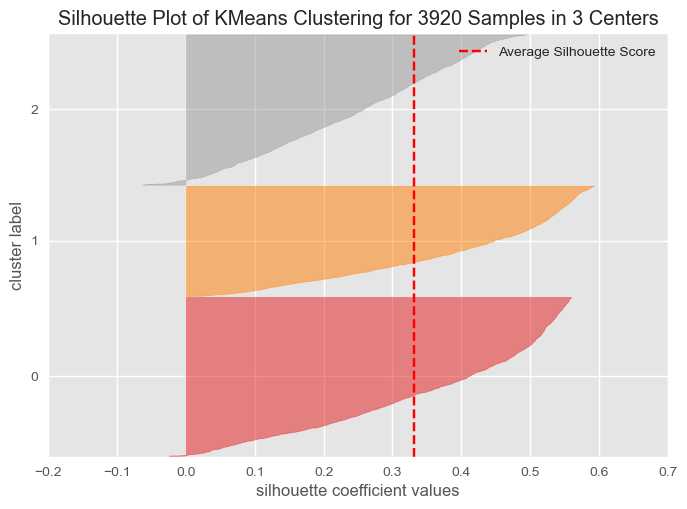

In [103]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model_3)

visualizer.fit(rfm_scaled)    # Fit the data to the visualizer
visualizer.poof();

The Silhouette Coefficient computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

In SilhouetteVisualizer plots, clusters with higher scores have wider silhouettes, but clusters that are less cohesive will fall short of the average score across all clusters, which is plotted as a vertical dotted red line. In other words, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

Notice that our graph contains heterogeneous and short silhouettes.

## Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

WATCH OUT: Be careful when determining the number of "n_clusters" and the expressions corresponding to the "labels" or "decision" columns, as my cluster analysis gives different results each time I run my notebook. Please consider the analysis of your own results as I did.

In [104]:
# prediction was added

kmeans = KMeans(n_clusters = 3).fit(rfm_scaled)
kmeans.fit_predict(rfm_scaled)
labels = kmeans.labels_
rfm_trans['ClusterID']=labels
rfm_trans.sample(10)

,Monetary,Frequency,Recency,ClusterID
318,-1.00,-1.16,1.42,2
3708,-1.71,-0.20,1.28,2
1314,0.13,-0.20,1.31,0
1339,0.44,0.32,-1.66,1
3418,-0.43,-0.20,-1.00,0
2228,-0.39,0.89,0.67,0
1186,0.86,0.89,-0.15,1
2607,-0.97,-1.16,1.25,2
1569,-1.46,-1.16,1.45,2
3308,-0.43,-1.16,1.38,2


In [105]:
rfm_trans.ClusterID.value_counts().sort_index()

ClusterID
0    1406
1    1029
2    1485
Name: count, dtype: int64

## Pie chart

Text(0.5, 1.0, "Cluster ID's with number of customers")

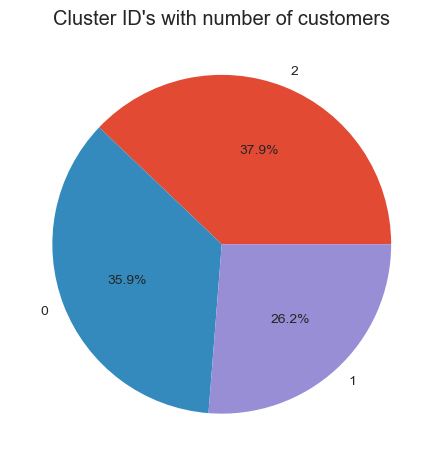

In [106]:
plt.pie(rfm_trans['ClusterID'].value_counts(),labels=rfm_trans['ClusterID'].value_counts().index,autopct='%1.1f%%')
plt.title("Cluster ID's with number of customers")

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

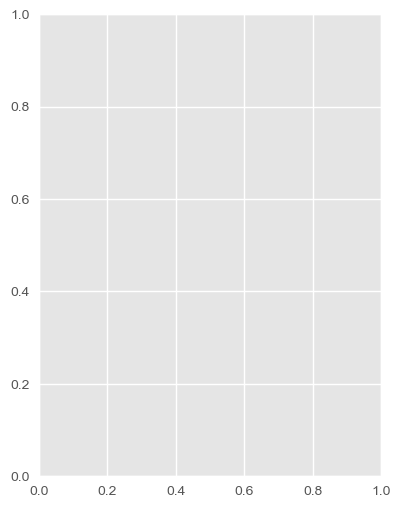

In [107]:

plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
sns.boxplot(rfm_trans['ClusterID'], rfm_trans['Recency'])

plt.subplot(1, 3, 2)
sns.boxplot(rfm_trans['ClusterID'], rfm_trans['Frequency'])

plt.subplot(1, 3, 3)
sns.boxplot(rfm_trans['ClusterID'], rfm_trans['Monetary'])
plt.show()

In [108]:
customer_rfm['ClusterID'] = labels
customer_rfm[['Recency_Score','Frequency_Score','Monetary_Score','Customer_RFM_Score','Customer_Category','ClusterID']].sample(5)

,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,Customer_Category,ClusterID
CustomerID,,,,,,
15652.00,2,1,2,212,Customer Needed Attention,2
15237.00,4,2,3,423,Top Recent Customer,1
13368.00,1,2,2,122,Lost Customer,2
14001.00,3,2,4,324,Top Loyal Customer,0
16931.00,4,4,4,444,Champion,1


#### Visualizing the Clusters

Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results.

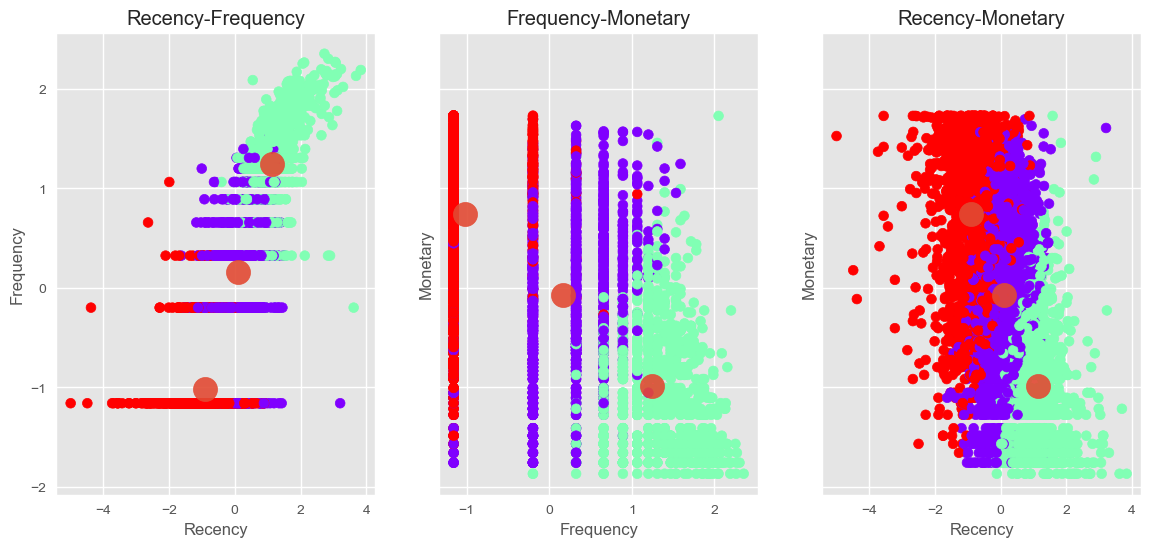

In [109]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 6)) # sharey=True ile y eksen labels lari ortak kullanirlar.

ax1.set_title('Recency-Frequency')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.scatter(rfm_trans.iloc[:, 0], rfm_trans.iloc[:, 1], c=kmeans.labels_, cmap="rainbow")
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=0.9, label = 'Centroids')

ax2.set_title("Frequency-Monetary")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.scatter(rfm_trans.iloc[:, 1], rfm_trans.iloc[:, 2], c=kmeans.labels_,cmap="rainbow")
ax2.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, alpha=0.9, label = 'Centroids')

ax3.set_title("Recency-Monetary")
ax3.set_xlabel('Recency')
ax3.set_ylabel('Monetary')
ax3.scatter(rfm_trans.iloc[:, 0], rfm_trans.iloc[:, 2], c=kmeans.labels_,cmap="rainbow")
ax3.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, alpha=0.9, label = 'Centroids');

Text(0.5, 1.0, 'Cluster representation')

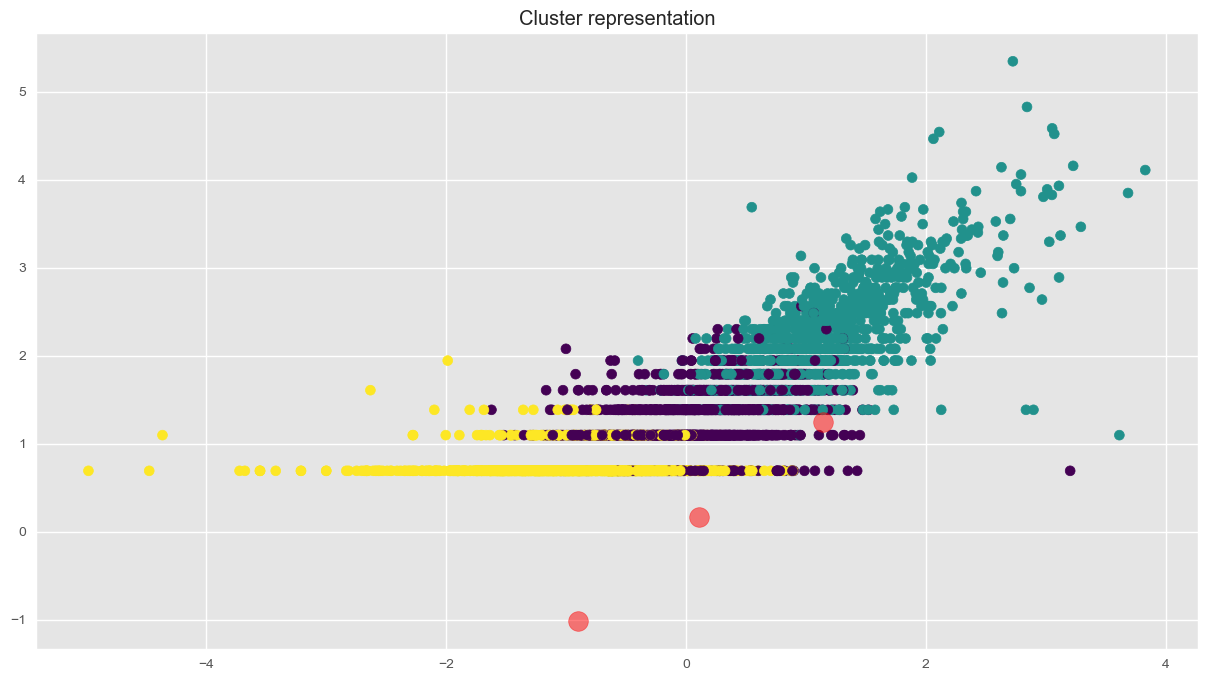

In [110]:
plt.figure(figsize=(15, 8))
plt.scatter(rfm_trans.iloc[:, 0], rfm_log.iloc[:, 1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids');
plt.title('Cluster representation')

#### Assigning the Label

In [111]:
rfm_trans['Labels'] = rfm_trans['ClusterID'].map({0:'Lost/Customers Need Attention ', 1:'Potential Custemers', 2:'Top/Loyal Customer'})
rfm_trans.sample(8) 

,Monetary,Frequency,Recency,ClusterID,Labels
2628,-0.39,-0.20,1.05,2,Top/Loyal Customer
1137,0.96,1.07,-1.16,1,Potential Custemers
2545,-0.27,-0.20,0.22,0,Lost/Customers Need Attention
2672,-0.45,-0.20,1.34,2,Top/Loyal Customer
464,1.62,2.07,-1.76,1,Potential Custemers
67,0.74,0.89,-1.66,1,Potential Custemers
1062,-0.62,-1.16,0.99,2,Top/Loyal Customer
3476,1.21,-0.20,-0.01,0,Lost/Customers Need Attention


Conclusion


- Cluster 0 : The first cluster is more related to the "Lost/Needed Attention Customers" who used to visit and shopping at different frequencies or who are still customer but haven’t been visiting recently. The store/department should bring them back with relevant personalized promotions, and run surveys to find out what went wrong and avoid losing them to a competitor.

- Cluster 1 : The second cluster belongs to the "Current Custemer" who have been shopping at different frequencies and spending in varying amounts. The store/department should offer membership or loyalty programs or recommend related products to upsell them and help them become its Loyalists or Champions, and offer renewals and helpful products to encourage another purchase.

- Cluster 2 : The third cluster can be interpreted as "Top/Best Customers" who have been shopping in average frequency or most recently, but spent a good amount. The store/department should reward or offer membership or loyalty programs them to become its Loyalists or Champions.

In [112]:
# column to added from first dataframe to second
extracted_col = rfm_trans['Labels']

# Second dataframe after adding column from first dataframe
#customer_rfm.insert(10, "K-Means Predicted Customer Category", extracted_col)
# customer_rfm = customer_rfm.join(extracted_col)
customer_rfm['K-Means Predicted Customers Category'] = rfm_trans['Labels'].values
customer_rfm.sample(8)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label,Customer_Category,ClusterID,K-Means Predicted Customers Category
CustomerID,,,,,,,,,,,
14577.00,19.00,4,859.71,4,2,3,423,9,Top Recent Customer,0,Lost/Customers Need Attention
14860.00,26.00,1,170.32,3,1,1,311,5,Loyal Customer,2,Top/Loyal Customer
15920.00,161.00,4,167.50,1,2,1,121,4,Lost Customer,0,Lost/Customers Need Attention
16015.00,10.00,3,704.55,4,2,3,423,9,Top Recent Customer,0,Lost/Customers Need Attention
16349.00,297.00,1,53.50,1,1,1,111,3,Lost Customer,2,Top/Loyal Customer
14964.00,254.00,1,206.21,1,1,1,111,3,Lost Customer,2,Top/Loyal Customer
16040.00,72.00,3,1313.55,2,2,3,223,7,Top Customer Needed Attention,0,Lost/Customers Need Attention
14766.00,15.00,6,2473.37,4,3,4,434,11,Top Recent Customer,1,Potential Custemers


In [113]:
customer_rfm['K-Means Predicted Customers Category'].value_counts()

K-Means Predicted Customers Category
Top/Loyal Customer                1485
Lost/Customers Need Attention     1406
Potential Custemers               1029
Name: count, dtype: int64

In [114]:
KMeans_Predicted_Clusters = pd.DataFrame(customer_rfm['K-Means Predicted Customers Category'].value_counts(dropna=False).sort_values(ascending=False))
KMeans_Predicted_Clusters.reset_index(inplace=True)
KMeans_Predicted_Clusters.rename(columns={'index':'K-Means Predicted Customers Category', 'K-Means Predicted Customers Category':'Number Of Customers'}, inplace=True)
KMeans_Predicted_Clusters

,Number Of Customers,count
0,Top/Loyal Customer,1485
1,Lost/Customers Need Attention,1406
2,Potential Custemers,1029


Text(0.5, 0, 'Count')

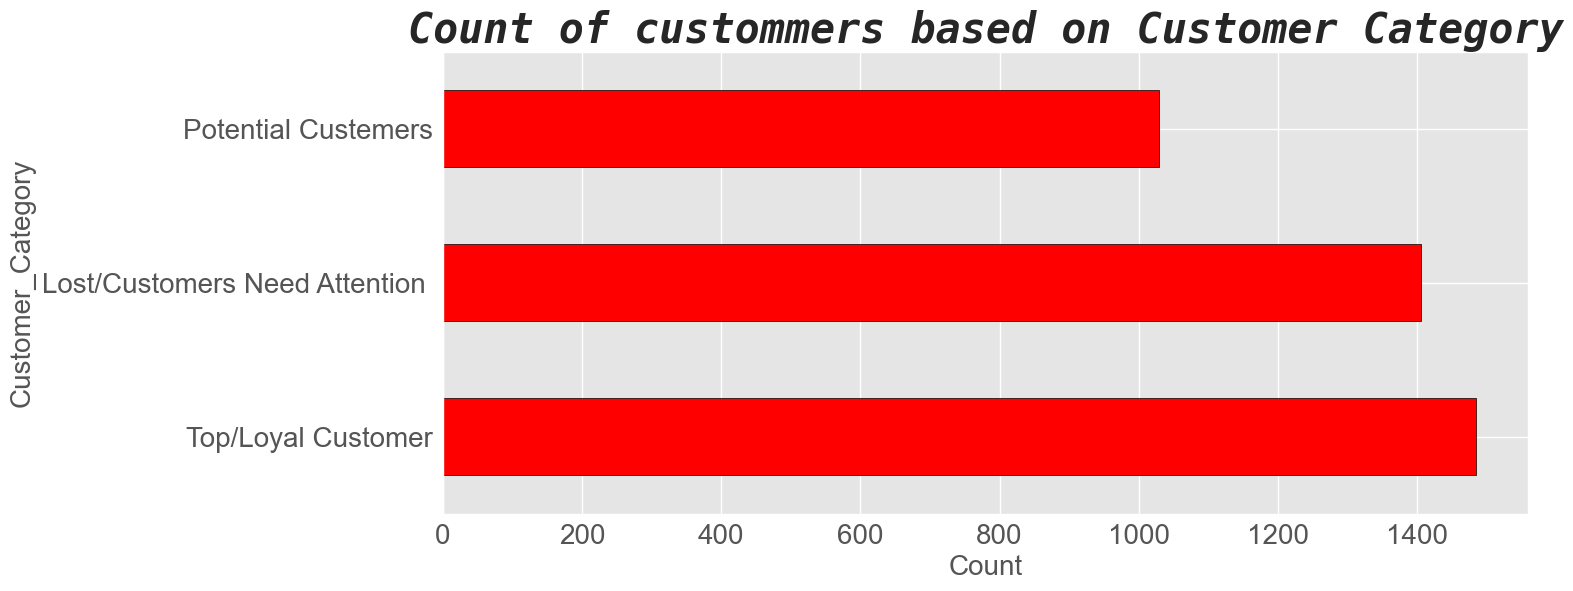

In [115]:
customer_rfm['K-Means Predicted Customers Category'].value_counts().plot(kind="barh", width=0.5, color='red',edgecolor='black', figsize=(14, 6));
plt.xticks(rotation=0)
plt.title('Count of custommers based on Customer Category',fontsize=30,
    loc='center',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.ylabel('Customer_Category',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Count',fontsize=20)

Discussion


Discuss your final results. Compare your own labels from the Customer Segmentation with the labels found by K-Means.

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

Annotation:

Limitations of K-means clustering:

There is no assurance that it will lead to the global best solution.
Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.
These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.